<a href="https://colab.research.google.com/github/Akschid/Interpretable-Machine-Learning-SHAP-Analysis-of-Credit-Risk-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement
To develop a predictive model for house prices using a given dataset. This involves data collection, cleaning, exploratory data analysis, feature engineering, and model building to accurately estimate house values based on various property characteristics.

## Data Collection: Load Dataset


Load the `House Price Prediction Dataset.csv` file into a pandas DataFrame and display its initial rows and basic information to understand the data structure and types.


**Reasoning**:
Import the pandas library, load the dataset into a DataFrame, display its first 5 rows, and print a concise summary of the DataFrame to understand its structure and data types.



In [ ]:
import pandas as pd
df = pd.read_csv('/content/House Price Prediction Dataset.csv')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 

## Data Cleaning: Handle Missing Values


Check for any missing values in the dataset and implement appropriate strategies to handle them (e.g., imputation or removal). This ensures the data is clean before further analysis.


**Reasoning**:
To identify any missing values in the dataset, I will use the `.isnull().sum()` method on the DataFrame `df`. This will provide a count of null values for each column, allowing me to determine which columns require handling.



In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


## Exploratory Data Analysis (EDA): Visualizations

Perform exploratory data analysis to understand the distributions of numerical features, relationships between features, and visualize the impact of categorical features on house prices. This will involve creating various plots like histograms, scatter plots, and box plots with legends.


**Reasoning**:
First, I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to facilitate data visualization. Then, I will create histograms for the specified numerical columns to visualize their distributions, ensuring each plot has a title and appropriate labels.



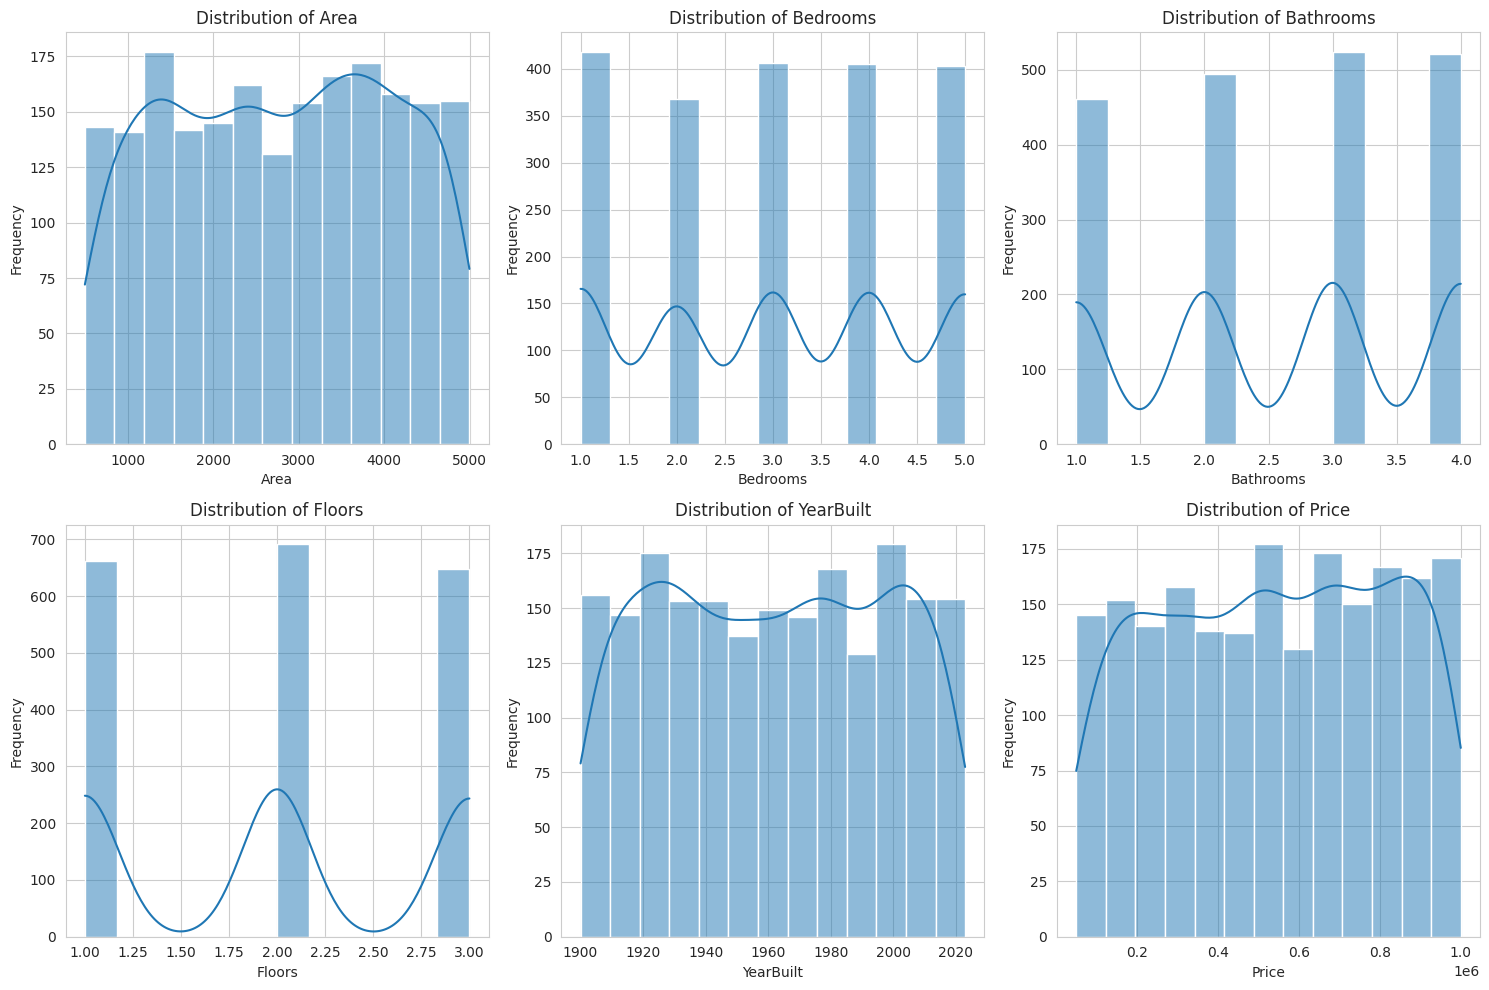

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for numerical columns
numerical_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of numerical columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
I have already created histograms for the numerical features. Now, to understand the relationships between numerical features and 'Price', I will create scatter plots as specified in the instructions. This will help visualize any correlations.



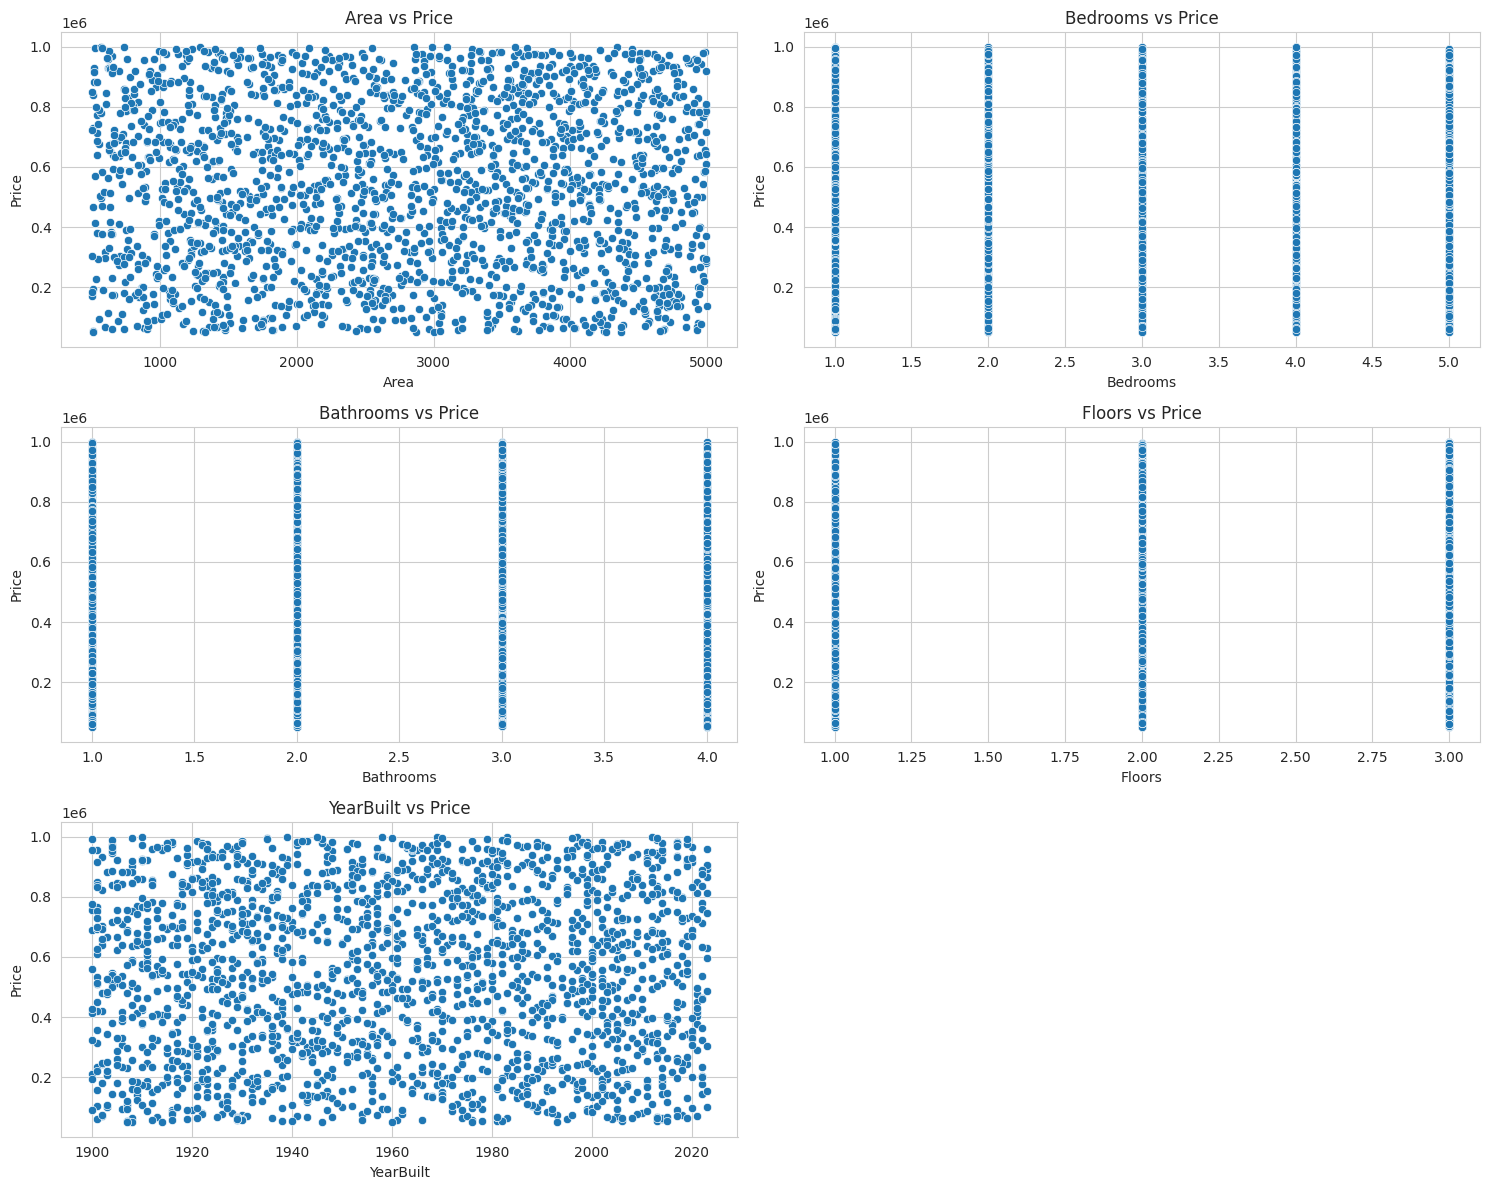

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for numerical columns against 'Price'
numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Adjust subplot grid
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Reasoning**:
I have completed the scatter plots. Now, I will generate box plots for the categorical features ('Location', 'Condition', 'Garage') against 'Price' to visualize their impact on house prices, which is the final part of the visualization subtask.



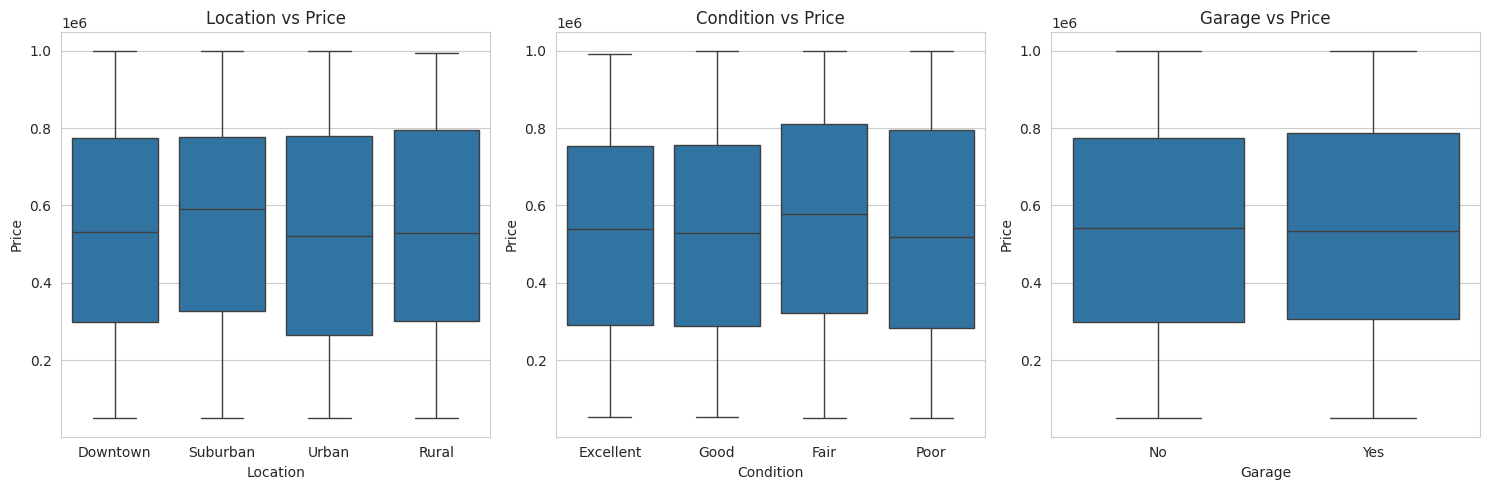

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots for categorical columns against 'Price'
categorical_features = ['Location', 'Condition', 'Garage']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)  # Adjust subplot grid
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Feature Engineering: One-Hot Encode Categorical Features

Apply one-hot encoding to the identified categorical columns ('Location', 'Condition', 'Garage') to convert them into a numerical format suitable for the regression model, and prepare the final feature set.


**Reasoning**:
To prepare the data for the regression model, I will apply one-hot encoding to the specified categorical columns ('Location', 'Condition', 'Garage') using `pd.get_dummies` and concatenate the results with the numerical features, storing the final feature set in `df_encoded`.



In [ ]:
categorical_cols = ['Location', 'Condition', 'Garage']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("First 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())
print("\nDataFrame Info after one-hot encoding:")
df_encoded.info()

First 5 rows of the DataFrame after one-hot encoding:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt   Price  Location_Rural  \
0   1  1360         5          4       3       1970  149919           False   
1   2  4272         5          4       3       1958  424998           False   
2   3  3592         2          2       3       1938  266746           False   
3   4   966         4          2       2       1902  244020           False   
4   5  4926         1          4       2       1975  636056           False   

   Location_Suburban  Location_Urban  Condition_Fair  Condition_Good  \
0              False           False           False           False   
1              False           False           False           False   
2              False           False           False            True   
3               True           False            True           False   
4              False           False            True           False   

   Condition_Poor  Garage_Yes  
0     

## Model Building: Train Linear Regression Model


Split the engineered data into training and testing sets, then build and train a Linear Regression model using the prepared features to predict house prices.


**Reasoning**:
To begin model training, I will first separate the features (X) and the target variable (y) from the `df_encoded` DataFrame, excluding the 'Id' column from the features. Then, I will split this data into training and testing sets using `train_test_split` with a test size of 0.2 and a `random_state` for reproducibility. Finally, I will initialize and train a `LinearRegression` model on the training data.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Separate features (X) and target variable (y)
X = df_encoded.drop(['Price', 'Id'], axis=1)
y = df_encoded['Price']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Linear Regression model trained successfully.
X_train shape: (1600, 12)
X_test shape: (400, 12)
y_train shape: (1600,)
y_test shape: (400,)


## Model Evaluation: Assess Performance

Evaluate the trained model's performance using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²), and interpret these results.


**Reasoning**:
To evaluate the model's performance, I will first make predictions on the test set using the trained linear regression model. Then, I will import the necessary metrics from scikit-learn and calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score, printing each result for interpretation.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 3. Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 243241.97758826384
Mean Squared Error (MSE): 78321466146.0328
R-squared (R2): -0.006717808430749761


### Interpretation of Model Performance

*   **Mean Absolute Error (MAE)**: `243241.98`
    This metric represents the average absolute difference between the predicted and actual prices. An MAE of approximately 243,242 suggests that, on average, the model's price predictions are off by about $243,242. This is a very high error for house price prediction, indicating poor accuracy.

*   **Mean Squared Error (MSE)**: `78321466146.03`
    MSE measures the average of the squares of the errors. It penalizes larger errors more heavily than MAE. The high MSE value (approximately 7.8 x 10^10) further confirms that the model has significant errors in its predictions.

*   **R-squared (R²)**: `-0.0067`
    R-squared represents the proportion of the variance in the dependent variable (Price) that is predictable from the independent variables (features). An R-squared value typically ranges from 0 to 1, where 1 indicates a perfect fit. A negative R-squared value, as observed here, is a strong indication that the model is performing worse than simply predicting the mean of the target variable for all observations. This implies that the current linear regression model is not suitable for predicting house prices with the given features and data.




### Data Analysis Key Findings
*   The initial dataset contained 2000 entries and 10 columns with no missing values, including numerical features like 'Area' and 'Price', and categorical features like 'Location', 'Condition', and 'Garage'.
*   Exploratory Data Analysis (EDA) successfully visualized the distributions of numerical features and the impact of categorical features on house prices, revealing insights into data characteristics.
*   Categorical features ('Location', 'Condition', 'Garage') were successfully one-hot encoded, expanding the feature set to 14 columns for model training.
*   The Linear Regression model, trained on 1600 samples and tested on 400 samples, demonstrated very poor performance:
    *   **Mean Absolute Error (MAE):** Approximately \$243,241.98, indicating a large average prediction error.
    *   **Mean Squared Error (MSE):** Approximately \$78,321,466,146.03, further highlighting significant errors.
    *   **R-squared (R²):** -0.0067. A negative R-squared value signifies that the model performs worse than a simple horizontal line (predicting the mean of the target variable), suggesting it fails to explain any variance in house prices.

### Insights or Next Steps
*   The current Linear Regression model is not effective for predicting house prices. Consider exploring more advanced machine learning models, such as Random Forest, Gradient Boosting, or neural networks, which can capture non-linear relationships.
*   Further feature engineering, including creating interaction terms, polynomial features, or incorporating external data, could significantly improve model performance. Additionally, feature scaling for numerical variables might benefit certain models.
